<a href="https://colab.research.google.com/github/vinay-asish/CAP-ELITE-problems/blob/main/assignment_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score , KFold , LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# function for plotting
def plot_decision_boundary(model, X, y, n_neighbors):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    h = .02  # Step size in the mesh

    # Creating a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the result to create a grid of predictions
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"kNN Decision Boundary (k={n_neighbors})")
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

In [ ]:
data=pd.read_csv("/content/hw_data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Propellant age       10 non-null     float64
 1   Storage temperature  10 non-null     float64
 2   Pass/fail            10 non-null     object 
dtypes: float64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
data.shape

(10, 3)

In [ ]:
data

,Propellant age,Storage temperature,Pass/fail
0,15.50,40.00,fail
1,23.75,23.25,fail
2,8.00,17.00,pass
3,17.00,21.00,fail
4,5.50,10.00,pass
5,19.00,12.00,pass
6,24.00,20.00,fail
7,2.50,12.00,pass
8,7.50,15.00,pass
9,11.00,26.00,fail


In [ ]:
x=data.iloc[:,0:2].to_numpy()
y=data.iloc[:,2].to_numpy()

In [ ]:
x,y

(array([[15.5 , 40.  ],
        [23.75, 23.25],
        [ 8.  , 17.  ],
        [17.  , 21.  ],
        [ 5.5 , 10.  ],
        [19.  , 12.  ],
        [24.  , 20.  ],
        [ 2.5 , 12.  ],
        [ 7.5 , 15.  ],
        [11.  , 26.  ]]),
 array(['fail', 'fail', 'pass', 'fail', 'pass', 'pass', 'fail', 'pass',
        'pass', 'fail'], dtype=object))

In [ ]:
le=LabelEncoder()
y_values=le.fit_transform(y)

In [ ]:
y_values

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y_values)

KNeighborsClassifier()

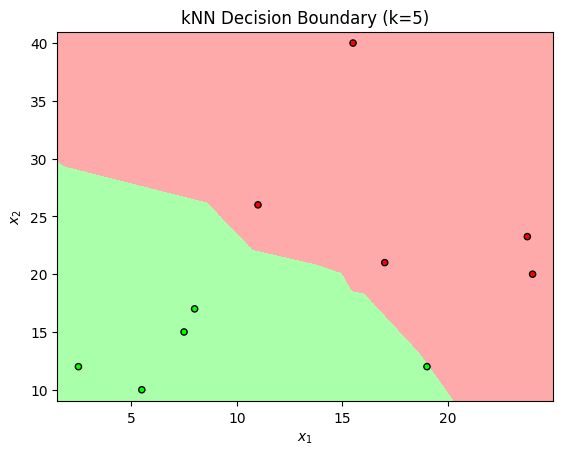

In [ ]:
plot_decision_boundary(knn,x,y_values,n_neighbors=5)

In [ ]:
no_of_folds=4
k_fold=KFold(n_splits=no_of_folds,shuffle=False)

In [ ]:
cross_val_res=cross_val_score(knn,x,y_values,cv=k_fold,scoring='accuracy')

In [ ]:
print(cross_val_res)

[1.         0.66666667 1.         1.        ]


In [ ]:
print(cross_val_res.mean())

0.9166666666666666


In [ ]:
loo=LeaveOneOut()

In [ ]:
y_true, y_pred = list(), list()

In [31]:
for train_val,test_val in loo.split(x):
  x_train, x_test=x[train_val],x[test_val]
  y_train,y_test=y[train_val],y[test_val]
  knn=KNeighborsClassifier(n_neighbors=5)
  knn.fit(x_train,y_train)
  yhat = knn.predict(x_test)
  y_true.append(y_test[0])
  y_pred.append(yhat[0])
  print(y_test,yhat)

['fail'] ['fail']
['fail'] ['fail']
['pass'] ['pass']
['fail'] ['fail']
['pass'] ['pass']
['pass'] ['fail']
['fail'] ['fail']
['pass'] ['pass']
['pass'] ['pass']
['fail'] ['fail']


In [32]:
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.900


In [34]:
loo_acc=[]
k_values=[1,2,3,4,5,6,7]
for i in k_values:
  knn_new=KNeighborsClassifier(n_neighbors=i)
  loocv=LeaveOneOut()
  loo_accuracy=[]
  for train_val,test_val in loocv.split(x):
    x_train, x_test=x[train_val],x[test_val]
    y_train,y_test=y[train_val],y[test_val]
    knn_new.fit(x_train,y_train)
    y_predicted = knn_new.predict(x_test)
    loo_accuracy.append(accuracy_score(y_test,y_predicted))
  loo_acc.append(np.mean(loo_accuracy))
print(loo_acc)

[0.9, 0.9, 0.8, 0.9, 0.9, 0.9, 0.7]


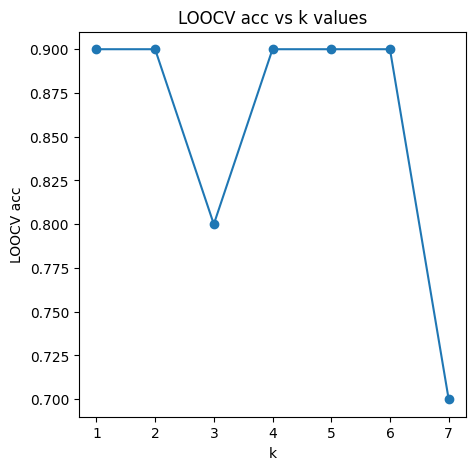

In [39]:
plt.figure(figsize=(5,5))
plt.plot(k_values, loo_acc, marker='o')
plt.title('LOOCV acc vs k values')
plt.xlabel('k')
plt.ylabel('LOOCV acc')
plt.show()

In [40]:
optimal_k_val = k_values[np.argmax(loo_acc)]
print(f'Optimal k: {optimal_k_val}')

Optimal k: 1
